# Factor Model for our Portfolio

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from contract_portfolio import ContractPortfolio
from factor_portfolio import FactorPortfolio, factor_symbols
import portfolio_utils as utils

C:\Users\kbott\AppData\Local\Temp\ipykernel_28236\213760603.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Building Portfolio

In [18]:
# Initialize Portfolio object
contract_portfolio = ContractPortfolio()
portfolio_returns = contract_portfolio.get_returns()

portfolio_returns.head()

Contract 1 / 40 (6A) added to the portfolio.
Contract 2 / 40 (6C) added to the portfolio.
Contract 3 / 40 (6S) added to the portfolio.
Contract 4 / 40 (KC) added to the portfolio.
Contract 5 / 40 (HG) added to the portfolio.


,Portfolio Return
0,
1987-01-13,-0.334659
1987-01-14,0.365644
1987-01-15,0.110805
1987-01-16,0.051057
1987-01-19,0.182246


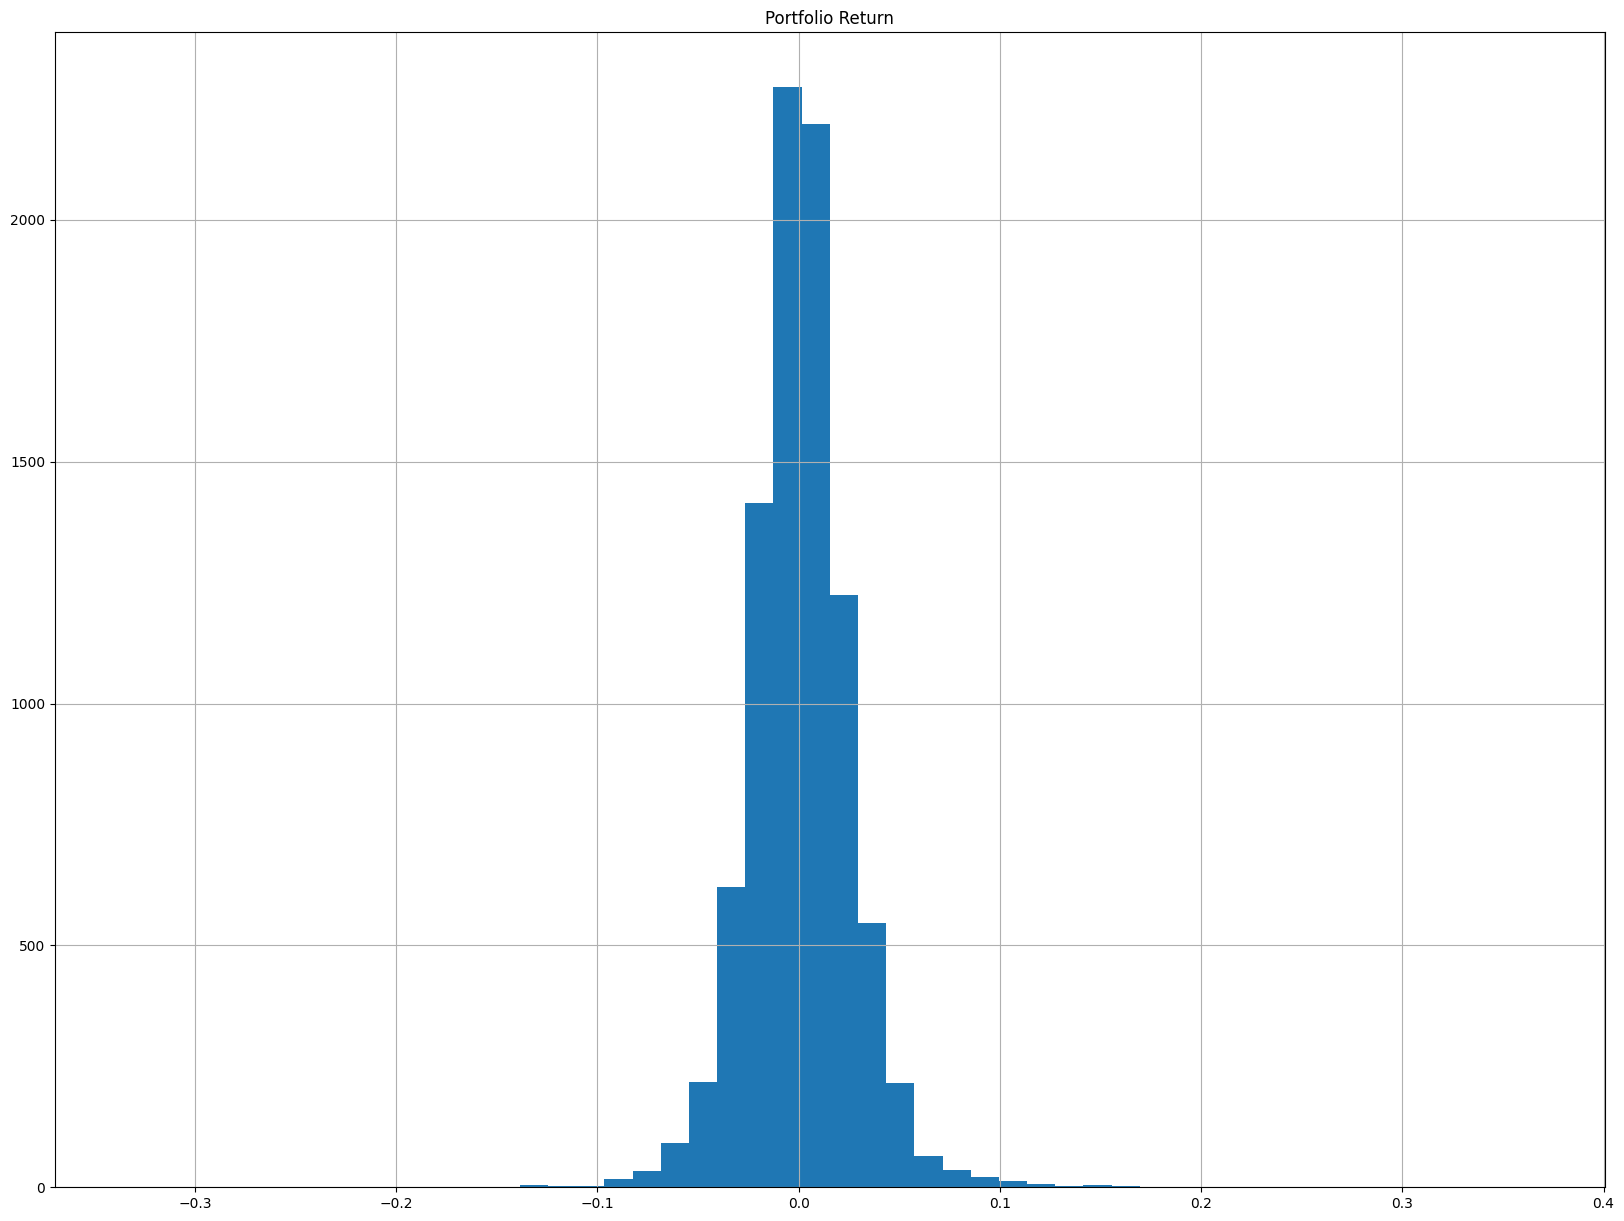

In [17]:
# Plot histogram of portfolio returns
portfolio_returns.hist(bins=50, figsize=(20, 15))
plt.show()

In [4]:
# Initialize FactorPortfolio object
factor_portfolio = FactorPortfolio(start_date=portfolio_returns.index[0], end_date=portfolio_returns.index[-1])
factor_returns = factor_portfolio.get_returns()
factor_returns.head()

FactorPortfolio initialized with start date: 1987-01-13 00:00:00 and end date: 2023-01-26 00:00:00


C:\Users\kbott\OneDrive\Desktop\School\UF Algo Fund\Python Files\factorModelv2\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\kbott\OneDrive\Desktop\School\UF Algo Fund\Python Files\factorModelv2\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\kbott\OneDrive\Desktop\School\UF Algo Fund\Python Files\factorModelv2\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecat

,Volatility Risk,Interest Rate Risk,Inflation Risk,Credit Risk,Equity Market Risk,Currency Risk,Commodity Price Risk,Energy Price Risk,Metals Price Risk,Agricultural Price Risk,Emerging Market Risk,Developed Market Risk,Systematic Risk
Date,,,,,,,,,,,,,
2011-03-21,-0.156710,0.014037,-0.002720,0.0,0.015498,-0.004226,0.007861,0.026848,0.015161,-0.001719,0.017927,0.024993,0.016127
2011-03-22,-0.019408,0.002708,-0.003636,0.0,-0.003469,0.000398,0.010329,-0.000386,0.003959,0.001722,0.001074,-0.002709,-0.003695
2011-03-23,-0.051460,0.004802,-0.001825,0.0,0.002862,0.004773,0.002140,0.001160,0.028972,-0.010627,0.012873,-0.000272,0.002639
2011-03-24,-0.061033,0.016726,0.000000,0.0,0.009563,-0.001715,0.003559,0.000901,0.002111,0.016427,0.012286,0.013859,0.009440
2011-03-25,-0.005000,0.011751,-0.003656,0.0,0.003056,0.007402,-0.000487,0.011958,-0.003893,-0.002020,0.000000,-0.012329,0.003941


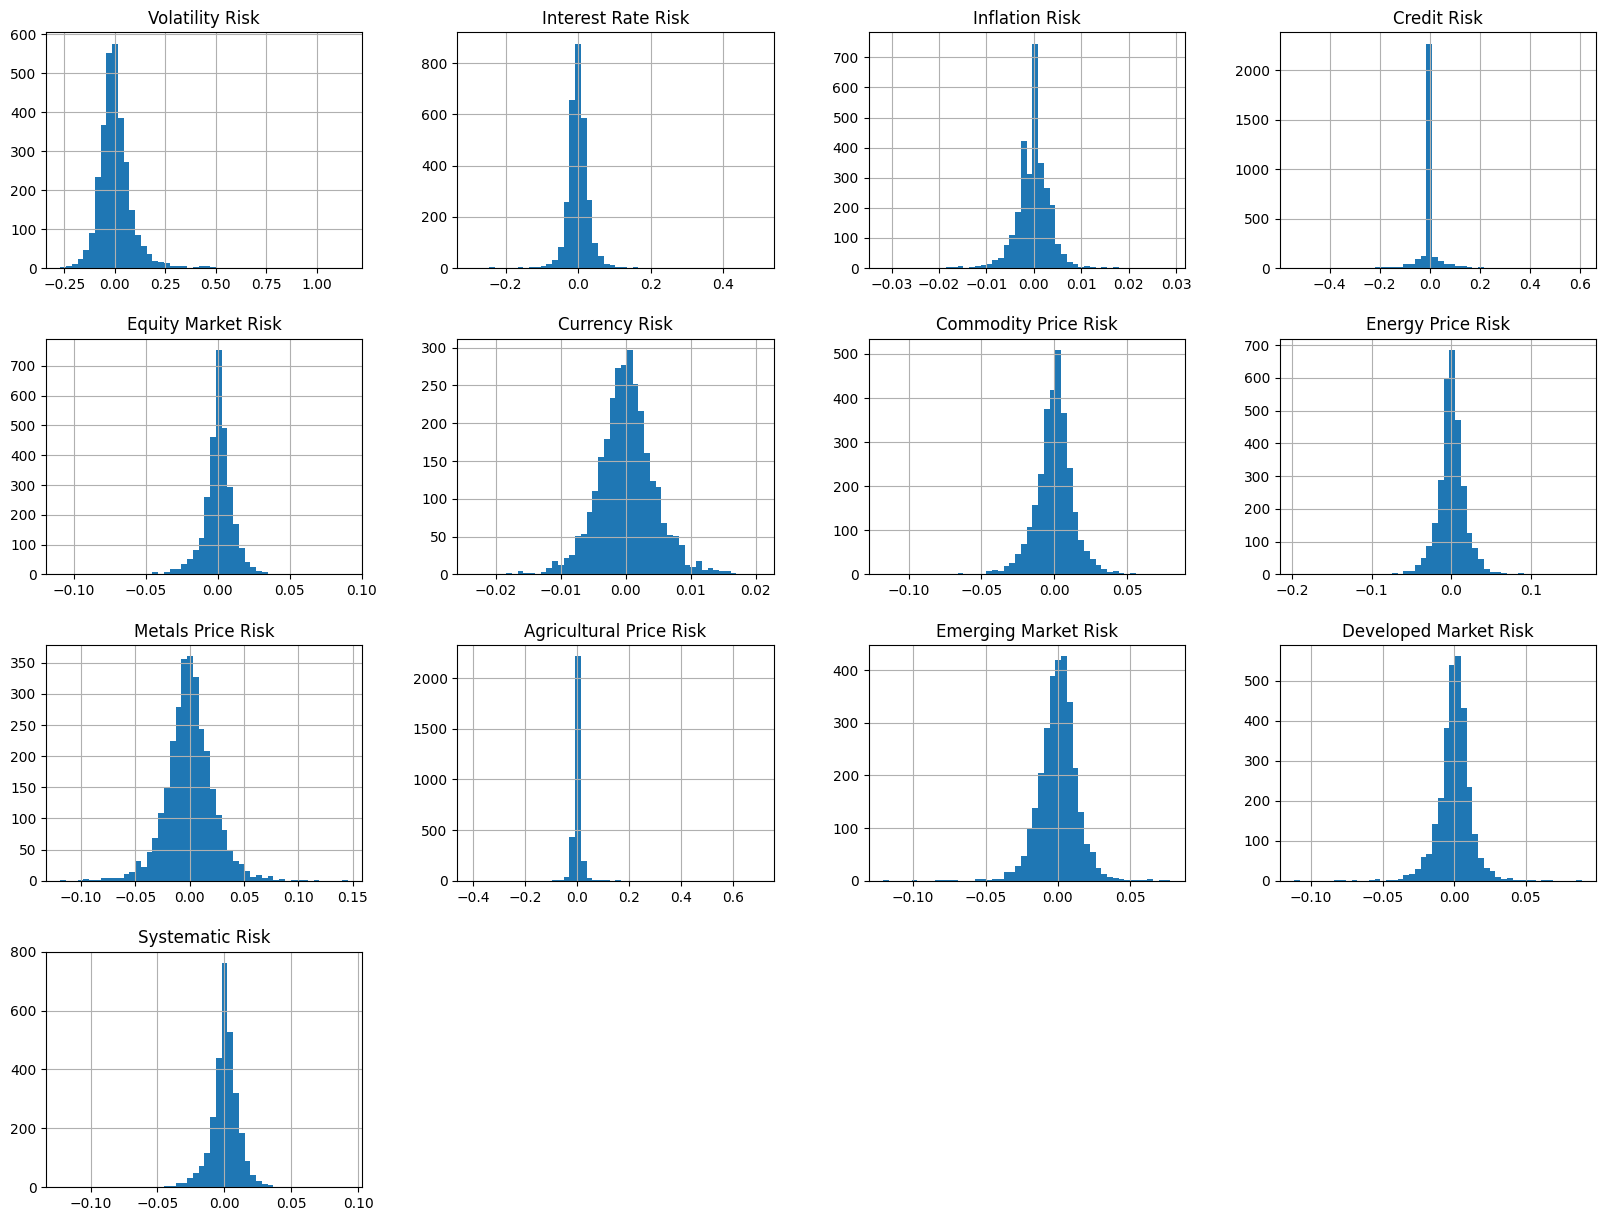

In [9]:
# Plot histogram of each column in the factor returns
factor_returns.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
combined_returns = utils.prepare_data(portfolio_returns, factor_returns)
combined_returns.head()

,Portfolio Return,Volatility Risk,Interest Rate Risk,Inflation Risk,Credit Risk,Equity Market Risk,Currency Risk,Commodity Price Risk,Energy Price Risk,Metals Price Risk,Agricultural Price Risk,Emerging Market Risk,Developed Market Risk,Systematic Risk
2011-03-21,0.006073,-0.156710,0.014037,-0.002720,0.0,0.015498,-0.004226,0.007861,0.026848,0.015161,-0.001719,0.017927,0.024993,0.016127
2011-03-22,-0.033118,-0.019408,0.002708,-0.003636,0.0,-0.003469,0.000398,0.010329,-0.000386,0.003959,0.001722,0.001074,-0.002709,-0.003695
2011-03-23,-0.005001,-0.051460,0.004802,-0.001825,0.0,0.002862,0.004773,0.002140,0.001160,0.028972,-0.010627,0.012873,-0.000272,0.002639
2011-03-24,-0.004031,-0.061033,0.016726,0.000000,0.0,0.009563,-0.001715,0.003559,0.000901,0.002111,0.016427,0.012286,0.013859,0.009440
2011-03-25,0.003434,-0.005000,0.011751,-0.003656,0.0,0.003056,0.007402,-0.000487,0.011958,-0.003893,-0.002020,0.000000,-0.012329,0.003941


In [13]:
# Define independent variable (features) and dependent variable
X = combined_returns[[factor_name for factor_name in factor_symbols.values()]]
Y = combined_returns['Portfolio Return']
X, Y

(            Volatility Risk  Interest Rate Risk  Inflation Risk  Credit Risk  \
 2011-03-21        -0.156710            0.014037       -0.002720     0.000000   
 2011-03-22        -0.019408            0.002708       -0.003636     0.000000   
 2011-03-23        -0.051460            0.004802       -0.001825     0.000000   
 2011-03-24        -0.061033            0.016726        0.000000     0.000000   
 2011-03-25        -0.005000            0.011751       -0.003656     0.000000   
 ...                     ...                 ...             ...          ...   
 2023-01-19         0.008850            0.006519        0.004817     0.040000   
 2023-01-20        -0.032651            0.025611       -0.004794     0.038462   
 2023-01-23        -0.002015            0.011768        0.000000     0.000000   
 2023-01-24        -0.030792           -0.015887        0.004817     0.000000   
 2023-01-25        -0.006250           -0.002018        0.002876     0.000000   
 
             Equity Market

C:\Users\kbott\OneDrive\Desktop\School\UF Algo Fund\Python Files\factorModelv2\factor_model\portfolio_utils.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4, color='red')  # Diagonal line for reference
C:\Users\kbott\OneDrive\Desktop\School\UF Algo Fund\Python Files\factorModelv2\factor_model\portfolio_utils.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4, color='red')  # Diagonal line for reference
C:\Users\kbott\OneDrive\Desktop\School\UF Algo Fund\Python Files\factorModelv2\factor_model\portfolio_utils.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keywor

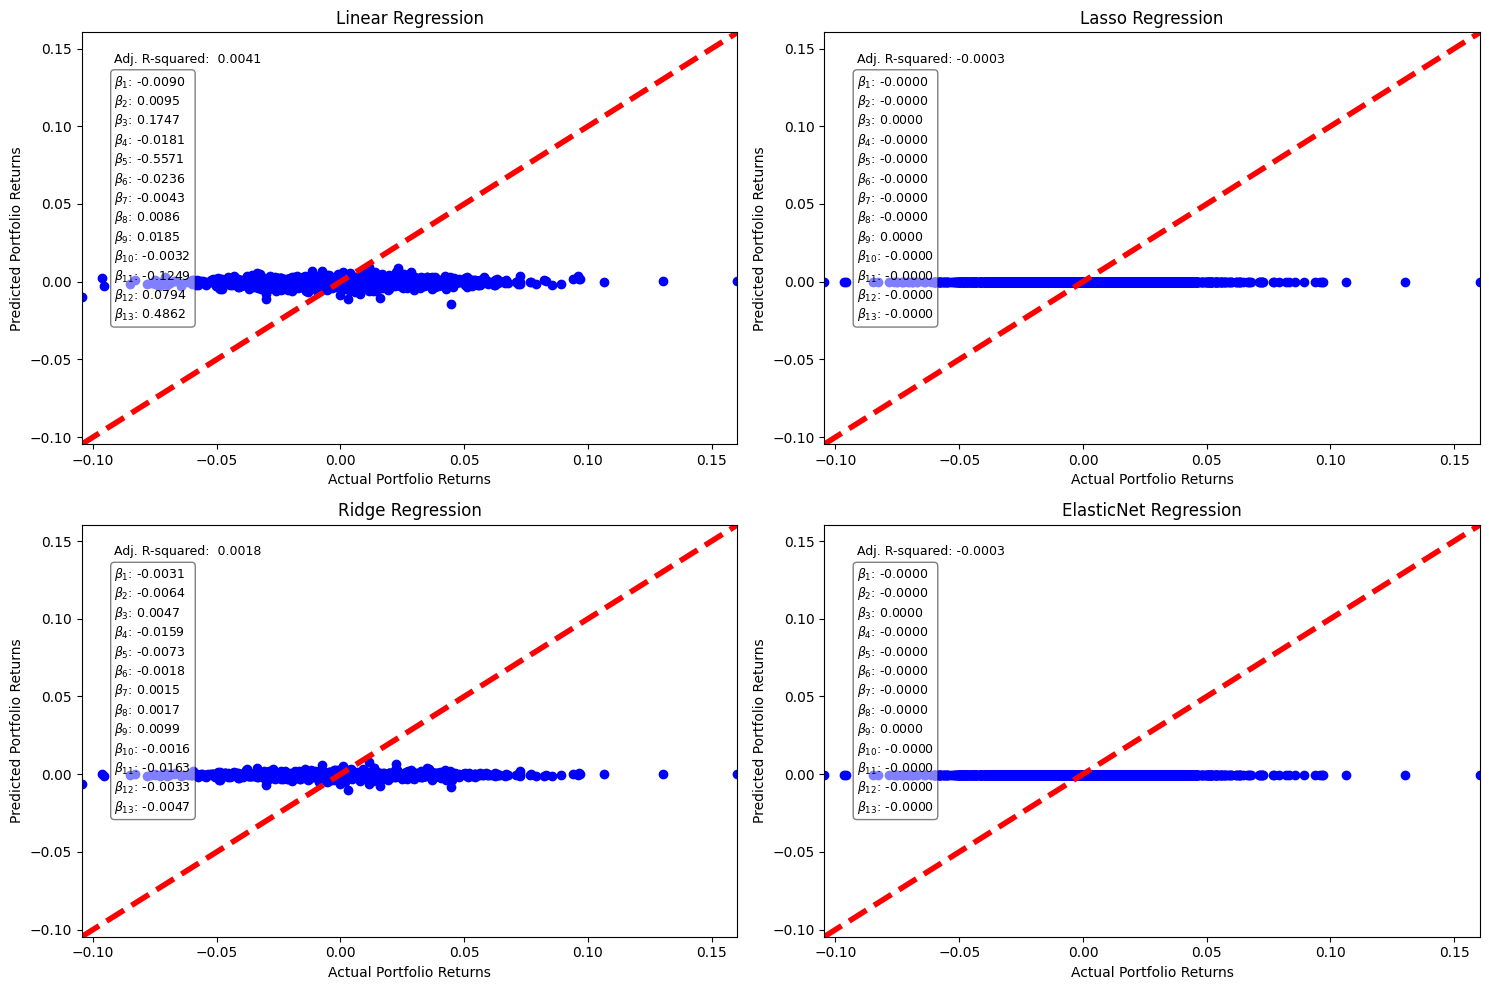

In [19]:
# Perform grid search to find optimal alpha for Lasso and ElasticNet
lasso_params, elasticnet_params = utils.perform_grid_search(X, Y)

# Perform different regressions using the optimal alphas
models = utils.perform_different_regressions(X, Y, lasso_params['alpha'], elasticnet_params['alpha'])

# Plot results for each regression model
utils.plot_all_regression_results(X, Y, models)